In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [81]:
data = pd.read_csv(r'C:\Users\arpit tiwar\Downloads\placement.csv')
data.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [82]:
df = data.iloc[:,1:]
df.head(3)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


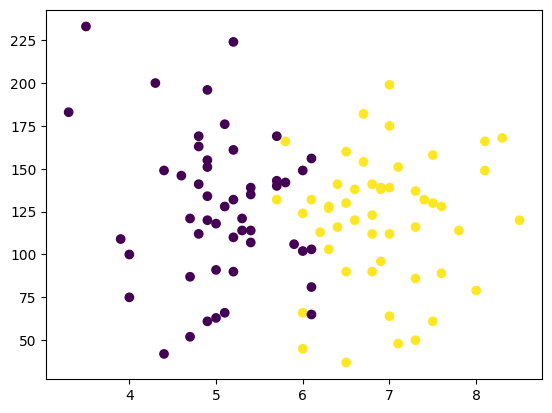

In [84]:
plt.scatter(df['cgpa'], df['iq'],c = df['placement'])

In [85]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


# Training the model

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_text, Y_train, Y_text = train_test_split(X,Y,test_size = 0.3)

In [88]:
print(f" Student data \n{X_train}")

 Student data 
    cgpa     iq
78   6.1   81.0
50   3.5  233.0
35   6.8   90.0
34   4.8  163.0
65   8.1  166.0
..   ...    ...
24   4.7  121.0
85   5.8  166.0
30   7.6  128.0
83   7.5  130.0
2    5.3  121.0

[70 rows x 2 columns]


In [89]:
print(f" placement confermation data \n{Y_train}")


 placement confermation data 
78    0
50    0
35    1
34    0
65    1
     ..
24    0
85    1
30    1
83    1
2     0
Name: placement, Length: 70, dtype: int64


In [90]:
X_text

,cgpa,iq
87,5.7,132.0
88,4.4,149.0
76,4.9,155.0
13,6.4,116.0
79,6.5,90.0
40,4.9,134.0
43,6.8,141.0
56,6.1,65.0
44,7.5,61.0
38,6.5,160.0


In [91]:
Y_text

87    1
88    0
76    0
13    1
79    1
40    0
43    1
56    0
44    1
38    1
91    1
37    1
66    1
82    1
96    0
26    1
47    0
8     0
71    1
6     0
46    0
14    0
55    1
49    0
94    0
36    0
18    0
75    0
21    1
23    0
Name: placement, dtype: int64

# SCALING 


In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()


In [94]:
X_train = scaler.fit_transform(X_train)

In [95]:
X_train

array([[ 0.0823304 , -1.0993153 ],
       [-2.15410727,  2.73944899],
       [ 0.68444823, -0.87202005],
       [-1.03588843,  0.97159701],
       [ 1.80266706,  1.0473621 ],
       [ 0.8564819 , -1.52865078],
       [-2.32614093,  1.47669758],
       [-0.08970327, -0.46793959],
       [ 2.1467344 , -0.1143692 ],
       [-0.86385477, -1.55390581],
       [ 0.5984314 ,  0.74430176],
       [ 0.51241456,  0.34022131],
       [ 0.5984314 ,  1.45144255],
       [ 1.20054923,  0.18869114],
       [-1.7240231 , -1.25084547],
       [-0.51978744, -0.26589937],
       [-0.77783793,  1.29991238],
       [ 1.71665023, -1.14982536],
       [-0.51978744, -0.44268457],
       [ 0.8564819 ,  0.36547634],
       [-1.4659726 ,  1.90603306],
       [-0.1757201 ,  0.44124142],
       [-1.2079221 ,  0.54226153],
       [ 0.77046506,  0.34022131],
       [-0.00368644,  0.61802662],
       [ 1.1145324 , -1.88222117],
       [ 0.8564819 ,  1.27465735],
       [ 1.3725829 , -0.89727507],
       [ 0.8564819 ,

In [96]:
X_text = scaler.transform(X_text)


# Train the model

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
clf = LogisticRegression()


In [99]:
# Model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [100]:
Y_pred = clf.predict(X_text)

In [101]:
Y_text

87    1
88    0
76    0
13    1
79    1
40    0
43    1
56    0
44    1
38    1
91    1
37    1
66    1
82    1
96    0
26    1
47    0
8     0
71    1
6     0
46    0
14    0
55    1
49    0
94    0
36    0
18    0
75    0
21    1
23    0
Name: placement, dtype: int64

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(Y_text, Y_pred)

0.8666666666666667

In [104]:
# check the pattern what my ml use 

In [105]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

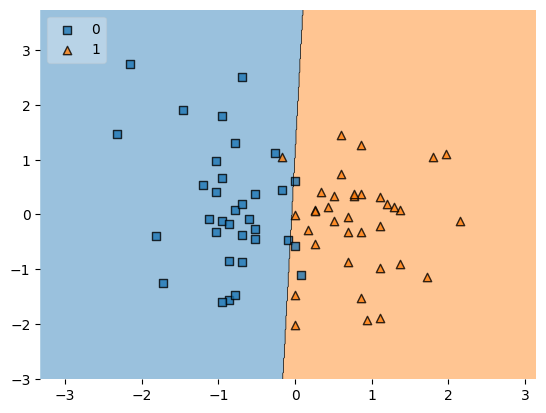

In [106]:
plot_decision_regions(X_train, Y_train.values, clf = clf , legend=2)